Importing the necessities


In [1]:
#importing the lib
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Loading the dataset 


In [2]:
import chardet
with open("spam.csv", 'rb') as f:
    result = chardet.detect(f.read())
df = pd.read_csv("spam.csv", encoding=result['encoding'])


In [3]:
#overviewing the dataset 
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4435,ham,"House-Maid is the murderer, coz the man was mu...",NaN,NaN,NaN
950,ham,"Awesome, lemme know whenever you're around",NaN,NaN,NaN
1368,ham,Alright. I'm out--have a good night!,NaN,NaN,NaN
1072,spam,Dear U've been invited to XCHAT. This is our f...,NaN,NaN,NaN
3024,ham,"What part of \don't initiate\"" don't you under...",NaN,NaN,NaN


Data Cleaning 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


From above , we can clearly see in columns 2,3 and 4 most of the values are null . So , dropping them is the best.

In [5]:
#dropping last three columns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#renaming the columns , since there are not informative 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
240,ham,Tomarrow final hearing on my laptop case so i ...
1620,ham,"Fuck babe, I miss you sooooo much !! I wish yo..."
105,ham,Thanks a lot for your wishes on my birthday. T...
1298,ham,Your daily text from me ‰ÛÒ a favour this time
5558,ham,"Sorry, I'll call later"


In [8]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df.target=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
#duplicate values 
df.duplicated().sum()

np.int64(403)

In [11]:
df.shape


(5572, 2)

In [12]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(5169, 2)

EDA

In [13]:
#checking data distribution of spam or ham 
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

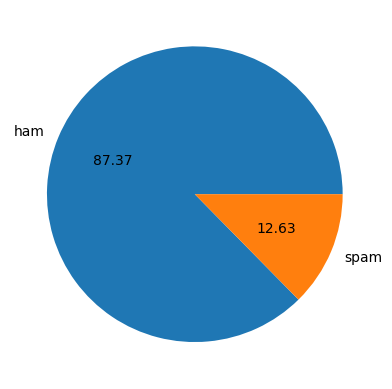

In [14]:
plt.pie(df.target.value_counts(),labels=['ham','spam'],autopct="%.2f")
plt.show()

from above , it can be seen that the data is imbalance 

In [15]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
#numver of characters in text
df['num_character']=df.text.apply(len)
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
#numbers of words
df['num_words']=df.text.apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [18]:
#numbers of sentences
df['num_sent']=df.text.apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_character,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df.describe()

,target,num_character,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [20]:
#ham
df[df.target==0][['num_character','num_words','num_sent']].describe()

,num_character,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
#spam
df[df.target==1][['num_character','num_words','num_sent']].describe()


,num_character,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [22]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

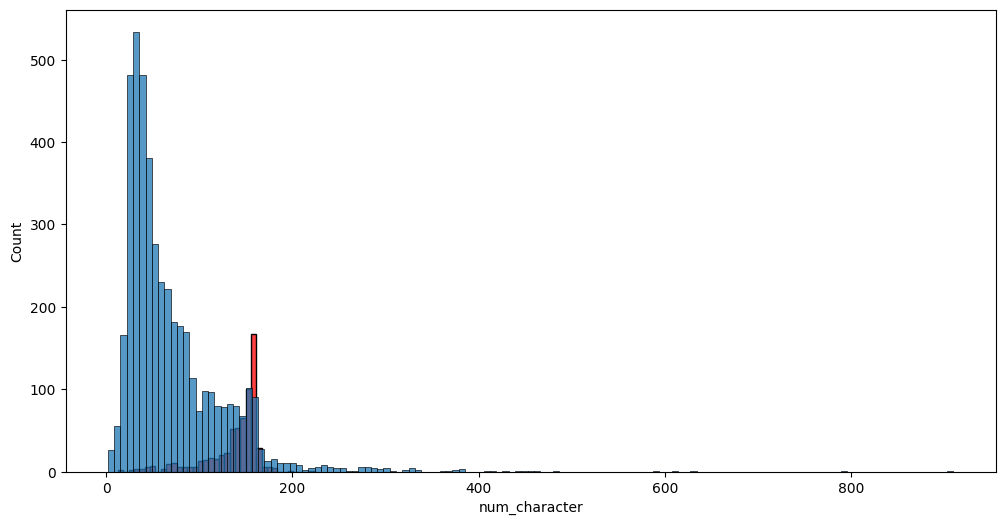

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.target==1]['num_character'],color='red')
sns.histplot(df[df.target==0]['num_character'])


<Axes: xlabel='num_words', ylabel='Count'>

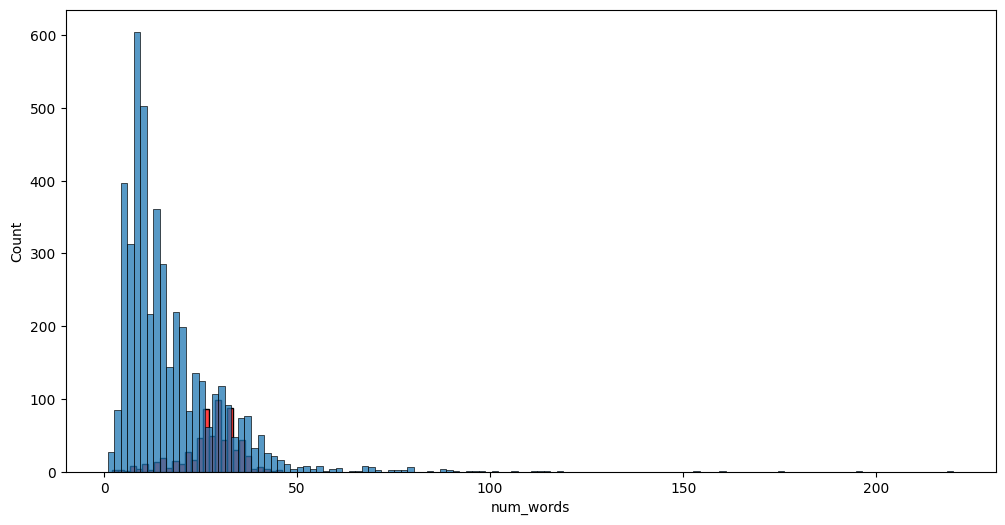

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df.target==1]['num_words'],color='red')
sns.histplot(df[df.target==0]['num_words'])

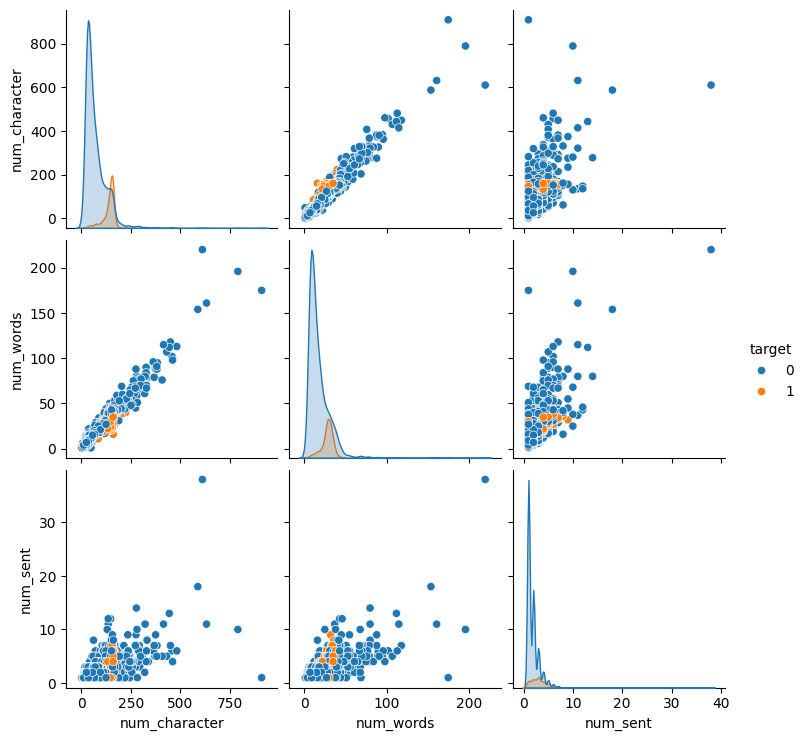

In [25]:
sns.pairplot(df,hue='target')

<Axes: >

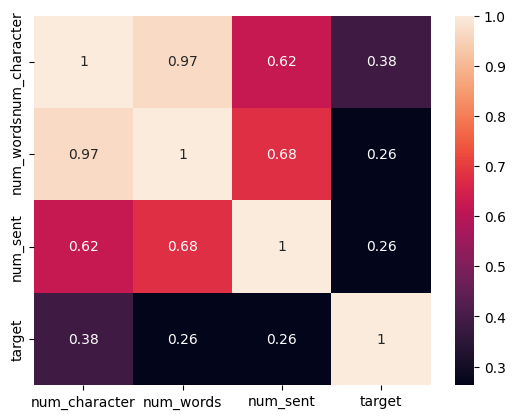

In [26]:
sns.heatmap(df[['num_character','num_words','num_sent','target']].corr(),annot=True)

from above relation , it can be seen that target is highly related to num_character and others are also related to num_characters highly .Thus , we will take num_character feature for model building for now!

Data(text) preprocessing
1)lowercase
2)tokenization
3)removing special characters
4)removing stop words and punctuation
5)stemming

In [27]:
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords


ps = PorterStemmer()

def transformed_text(text):
    # 1. Convert text to lowercase
    text = text.lower()
    
    # 2. Tokenize the text into words
    text = nltk.word_tokenize(text)
    
    # 3. Remove non-alphanumeric tokens (like emojis, punctuation, etc.)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # 4. Remove stopwords and punctuation
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    # 5. Stemming
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # 6. Return cleaned, stemmed, space-separated string
    return " ".join(y)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
df['transformed_text']=df.text.apply(transformed_text)
df.head()

,target,text,num_character,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [29]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white" )

In [30]:
spam_wc=wc.generate(df[df.target==1]['transformed_text'].str.cat(sep=" "))

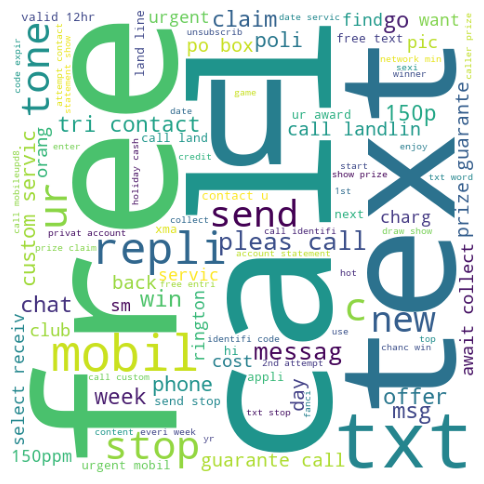

In [31]:
plt.figure(figsize=(6,14))
plt.imshow(spam_wc)
plt.axis("off")  # Hide axe
plt.show()

In [32]:
ham_wc=wc.generate(df[df.target==0]['transformed_text'].str.cat(sep=" "))

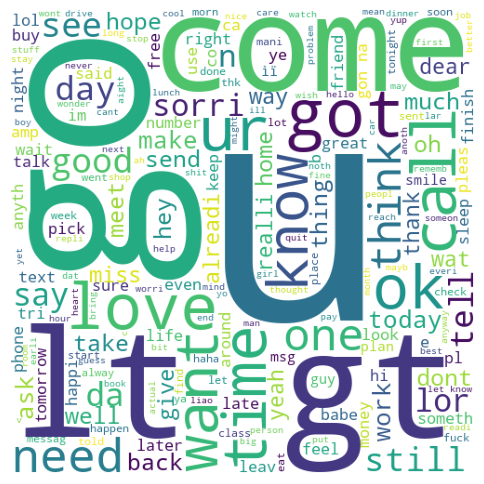

In [33]:
plt.figure(figsize=(6,14))
plt.imshow(ham_wc)
plt.axis("off")  # Hide axe
plt.show()

Model Building 

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [52]:
X=tfidf.fit_transform(df.transformed_text).toarray()
X.shape

(5169, 6708)

In [53]:
y=df.target.values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=52)

In [56]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [57]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8713733075435203
[[786 116]
 [ 17 115]]
0.49783549783549785


In [58]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9622823984526112
[[902   0]
 [ 39  93]]
1.0


In [59]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9632495164410058
[[896   6]
 [ 32 100]]
0.9433962264150944
